In [1]:
# https://arxiv.org/abs/cond-mat/0703314
# https://arxiv.org/abs/0808.3779

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [3]:
@jit(nopython=True)
def calc_rsks(L):
    rs = np.arange(L)
    ks = np.linspace(0,2.0*np.pi-2.0*np.pi/L,L)
    return rs,ks

@jit(nopython=True)
def calc_lmdks(J,ks):
    return -2.0*J*np.cos(ks)

@jit(nopython=True)
def calc_expkrs(ks,rs):
    return np.exp(1j*np.outer(ks,rs))

#@jit(nopython=True)
def calc_vs(t,lmdks,expkrs):
#    explmds = np.exp(-1j*t*lmdks)
    explmds = np.exp(-2j*t*lmdks)
    return np.einsum("i,ij,ik->jk",explmds,expkrs,expkrs.conjugate())/lmdks.shape[0]

@jit(nopython=True)
def calc_fs(vs):
    L = vs.shape[0]
    vsT = vs.T
    fij = np.eye(L,dtype=np.complex128)
    for i in range(L):
        for j in range(L):
            fij[i,j] -= (-1)**i * vsT[i,j]
    return 0.5*fij
#    return fij

In [4]:
L = 10
J = 1.0
t = 1.0

rs, ks = calc_rsks(L)
print(rs)
print(ks)

lmdks = calc_lmdks(J,ks)
print(lmdks)

expkrs = calc_expkrs(ks,rs)
#print(expkrs)
#print(np.allclose(expkrs,expkrs.T))

vs = calc_vs(t,lmdks,expkrs)
#print(vs)

fs = calc_fs(vs)
#print(fs)

[0 1 2 3 4 5 6 7 8 9]
[0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265
 3.76991118 4.39822972 5.02654825 5.65486678]
[-2.         -1.61803399 -0.61803399  0.61803399  1.61803399  2.
  1.61803399  0.61803399 -0.61803399 -1.61803399]


In [5]:
L = 20
J = 1.0
ts = np.linspace(0,10,101)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
fss = np.array(fss)

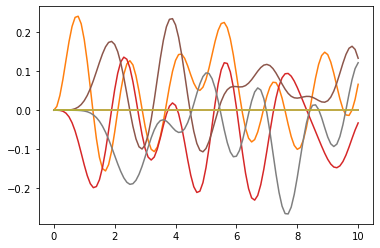

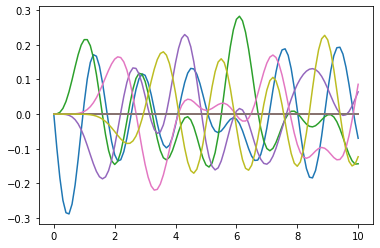

In [6]:
for r in rs[1:len(rs)//2]:
    plt.plot(ts,fss[:,0,r].real)
plt.show()

for r in rs[1:len(rs)//2]:
    plt.plot(ts,fss[:,0,r].imag)
plt.show()

In [7]:
L = 20
L_A = L//2
J = 1.0
ts = np.linspace(0,10,101)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
fss_A = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

In [8]:
print(np.allclose(fss_A[0],fss_A[0].T.conjugate()))
print(np.allclose(fss_A[10],fss_A[10].T.conjugate()))

True
True


In [9]:
eig = np.linalg.eigvalsh(fss_A[3])
print(eig)
meig = 1.0 - eig
eig[eig<1e-16] = np.finfo(eig.dtype).eps
meig[meig<1e-16] = np.finfo(meig.dtype).eps
ee1 = - np.sum(eig*np.log(eig)) - np.sum(meig*np.log(meig))
print(ee1)

ee1 = np.sum(-eig*np.log(eig))
print(ee1)
ee2 = -np.log(np.sum(eig**2))
print(ee2)

[1.79543880e-16 1.93829328e-14 2.91492808e-09 8.06801982e-05
 8.22974912e-02 9.17702509e-01 9.99919320e-01 9.99999997e-01
 1.00000000e+00 1.00000000e+00]
0.570372483741485
0.2851862418707485
-1.5787290693557383


In [10]:
ee1s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    meig = 1.0 - eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    meig[meig<1e-16] = np.finfo(meig.dtype).eps
    ee1 = - np.sum(eig*np.log(eig)) - np.sum(meig*np.log(meig))
    ee1s.append(ee1)

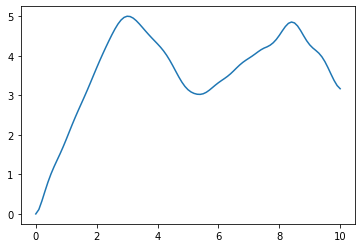

In [11]:
plt.plot(ts,ee1s)

In [12]:
L = 10
L_A = L//2
J = 1.0
ts = np.linspace(0,20,201)
#ts = np.linspace(0,100,201)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
fss_A = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

ee1s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    meig = 1.0 - eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    meig[meig<1e-16] = np.finfo(meig.dtype).eps
    ee1 = - np.sum(eig*np.log(eig)) - np.sum(meig*np.log(meig))
    ee1s.append(ee1)

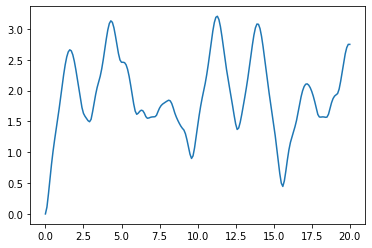

In [13]:
plt.plot(ts,ee1s)

In [14]:
L = 100
L_A = L//2
J = 1.0
#ts = np.linspace(0,20,201)
ts = np.linspace(0,100,201)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
fss_A = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

ee1s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    meig = 1.0 - eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    meig[meig<1e-16] = np.finfo(meig.dtype).eps
    ee1 = - np.sum(eig*np.log(eig)) - np.sum(meig*np.log(meig))
    ee1s.append(ee1)

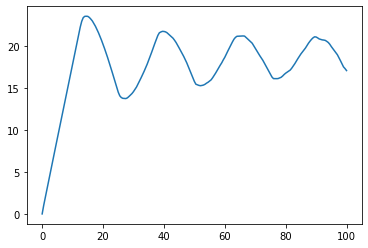

In [15]:
plt.plot(ts,ee1s)

In [16]:
L = 200
L_A = L//2
J = 1.0
#ts = np.linspace(0,20,201)
ts = np.linspace(0,100,201)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
fss_A = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

ee1s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    meig = 1.0 - eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    meig[meig<1e-16] = np.finfo(meig.dtype).eps
    ee1 = - np.sum(eig*np.log(eig)) - np.sum(meig*np.log(meig))
    ee1s.append(ee1)

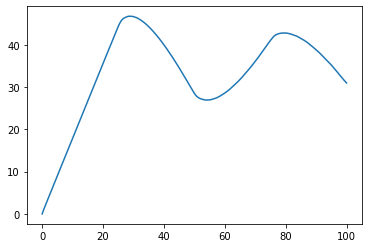

In [17]:
plt.plot(ts,ee1s)

In [18]:
L = 100
L_A = L//2
J = 1.0
#ts = np.linspace(0,20,201)
ts = np.linspace(0,100,201)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
fss_A = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

ee1s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    peig = 1.0 + eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    peig[peig<1e-16] = np.finfo(peig.dtype).eps
    #ee1 = - np.sum(eig*np.log(eig)) - np.sum(meig*np.log(meig))
    ee1 = - np.sum(eig*np.log(eig)) + np.sum(peig*np.log(peig))
    ee1s.append(ee1)

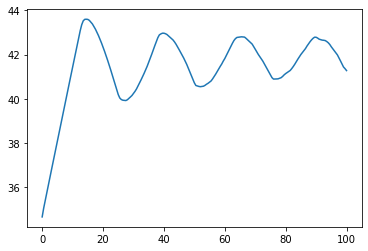

In [19]:
plt.plot(ts,ee1s)

In [20]:
L = 100
L_A = L//2
J = 1.0
#ts = np.linspace(0,20,201)
ts = np.linspace(0,100,201)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
fss_A = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

ee2s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    peig = 1.0 + eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    peig[peig<1e-16] = np.finfo(peig.dtype).eps
    ee2 = - np.log(np.sum(eig**2+peig**2))
    ee2s.append(ee2)

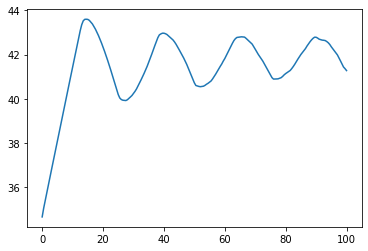

In [21]:
plt.plot(ts,ee1s)

In [24]:
L = 100
L_A = L//2
J = 1.0
#ts = np.linspace(0,20,201)
ts = np.linspace(0,100,201)
rs, ks = calc_rsks(L)
lmdks = calc_lmdks(J,ks)
expkrs = calc_expkrs(ks,rs)

fss = []
fss_A = []
for t in ts:
    vs = calc_vs(t,lmdks,expkrs)
    fs = calc_fs(vs)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

ee2s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    peig = 1.0 + eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    peig[peig<1e-16] = np.finfo(peig.dtype).eps
    ee2 = - np.log(np.sum(peig**2-eig**2))
    ee2s.append(ee2)

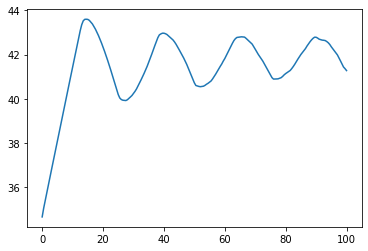

In [25]:
plt.plot(ts,ee1s)